<a href="https://colab.research.google.com/github/robocarstore/donkey-car-training-on-google-colab/blob/master/Donkey_Car_Training_using_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Donkey Car Training using Google Colab

Train your donkey car model using accelerated GPU for FREE on Google Colab

## Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [1]:
import tensorflow
print(tensorflow.__version__)

1.15.0


## Git Clone the donkey repository

In [2]:
!git clone https://github.com/autorope/donkeycar.git 
%cd /content/donkeycar

!git checkout master

Cloning into 'donkeycar'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 11000 (delta 7), reused 4 (delta 1), pack-reused 10986
Receiving objects: 100% (11000/11000), 58.81 MiB | 32.22 MiB/s, done.
Resolving deltas: 100% (6828/6828), done.
/content/donkeycar
Branch 'master' set up to track remote branch 'master' from 'origin'.
Switched to a new branch 'master'


## Install donkey car

In [3]:
!pip3 install -e .[pc]

Obtaining file:///content/donkeycar
     |████████████████████████████████| 102kB 4.0MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.0-cp36-none-any.whl size=61416 sha256=c24bf1dc0d94da61fee8fdafdb1bc3cc40a0d0b4fc7d04b3665e4ecc8e55a731
  Stored in directory: /root/.cache/pip/wheels/02/94/6c/8474137cb7a5a3e001d70a22c8ff919caee69435376bccce79
Successfully built paho-mqtt
  Running setup.py develop for donkeycar


## Create Project

In [4]:
!donkey createcar --path /content/mycar

using donkey v3.1.1 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


## Prepare Data
### Copy the following code and run on pi


```bash
cd ~/mycar/data
tar -czf tub_xx_yyyy_mm_dd.tar.gz tub_xx_yyyy_mm_dd

```

This will create a tub_xx_yyyy_mm_dd.tar.gz file under ~/mycar/data

## Upload Data


### Copy the tub to your local pc

Run this on your local pc if you are using linux/mac
```
sftp pi@raspberry.local
cd ~/mycar/data
get tub_xx_yyyy_mm_dd.tar.gz
```

If you are on a windows, download sftp utility like [filezilla](https://filezilla-project.org/) or [putty](https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html)

### Define your tub name here

In [0]:
tub_name="tub_49_19_12_10"

### Upload the tub to Google Drive

First upload the tub_x_yyyy_mm_dd.tar.gz to Google Drive. We will then mount Google Drive from colab and copy the data from Drive directly. When you run the cell below, you will need to click the link and generate an authorization code to for colab to access your drive.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Suppose you upload the tub_xx_yyyy_mm_dd.tar.gz to Google Drive/mycar/tub_xx_yyyy_mm_dd.tar.gz, this is how you copy it from Google Drive to colab

In [24]:
%cd /content/mycar/data
!cp /content/drive/My\ Drive/mycar/{tub_name}.tar.gz .

/content/mycar/data


And untar it to the right place

In [0]:
!tar -xzf {tub_name}.tar.gz

Check whether the data is there

In [26]:
!ls {tub_name}

10000_cam-image_array_.jpg  6703_cam-image_array_.jpg  record_3404.json
10001_cam-image_array_.jpg  6704_cam-image_array_.jpg  record_3405.json
10002_cam-image_array_.jpg  6705_cam-image_array_.jpg  record_3406.json
10003_cam-image_array_.jpg  6706_cam-image_array_.jpg  record_3407.json
10004_cam-image_array_.jpg  6707_cam-image_array_.jpg  record_3408.json
10005_cam-image_array_.jpg  6708_cam-image_array_.jpg  record_3409.json
10006_cam-image_array_.jpg  6709_cam-image_array_.jpg  record_340.json
10007_cam-image_array_.jpg  670_cam-image_array_.jpg   record_3410.json
10008_cam-image_array_.jpg  6710_cam-image_array_.jpg  record_3411.json
10009_cam-image_array_.jpg  6711_cam-image_array_.jpg  record_3412.json
1000_cam-image_array_.jpg   6712_cam-image_array_.jpg  record_3413.json
10010_cam-image_array_.jpg  6713_cam-image_array_.jpg  record_3414.json
10011_cam-image_array_.jpg  6714_cam-image_array_.jpg  record_3415.json
10012_cam-image_array_.jpg  6715_cam-image_array_.jpg  record_341

## Train your model

In [10]:
!python /content/mycar/manage.py train --type linear --model /content/mycar/models/mypilot.h5

using donkey v3.1.1 ...
loading config file: /content/mycar/config.py
loading personal config over-rides

config loaded
"get_model_by_type" model Type is: linear
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
training with model type <class 'donkeycar.parts.keras.KerasLinear'>
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             [(None, 120, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 58, 78, 24)   1824        img_in[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 58, 78, 24)   0           conv2d_1[0][0]

Check if the model is generated



In [11]:
!ls -alh /content/mycar/models

total 3.2M
drwxr-xr-x 2 root root 4.0K Dec 13 09:43 .
drwxr-xr-x 6 root root 4.0K Dec 13 09:42 ..
-rw-r--r-- 1 root root 3.2M Dec 13 09:43 mypilot.h5
-rw-r--r-- 1 root root  26K Dec 13 09:43 mypilot.h5_loss_acc_0.091524.png


/content/mycar/data


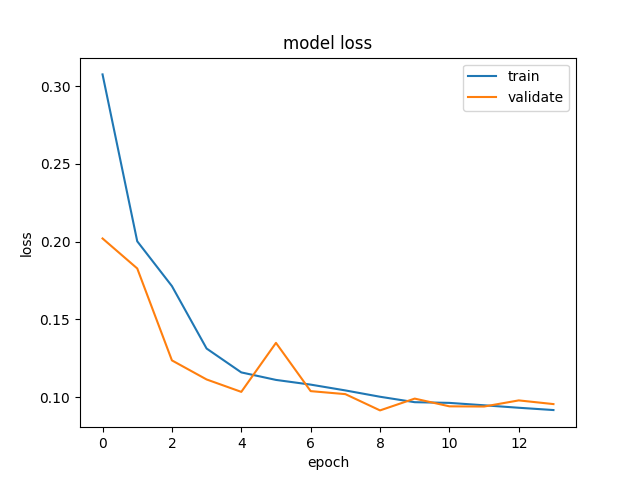

In [16]:
!pwd
from IPython.display import Image
Image('../models/mypilot.h5_loss_acc_0.091524.png')

## Copy the trained model back to Donkey Car (Pi)

Once the training is complete on colab, download the model file under /content/mycar/models/ folder location.

In [17]:
from google.colab import files

%cd /content/mycar/models
!ls -ahl
files.download('mypilot.h5')

/content/mycar/models
total 3.2M
drwxr-xr-x 2 root root 4.0K Dec 13 09:43 .
drwxr-xr-x 6 root root 4.0K Dec 13 09:42 ..
-rw-r--r-- 1 root root 3.2M Dec 13 09:43 mypilot.h5
-rw-r--r-- 1 root root  26K Dec 13 09:43 mypilot.h5_loss_acc_0.091524.png


Alternatively, you can copy the model back to Google Drive too

In [0]:
!cp /content/mycar/models/mypilot.h5 /content/drive/My\ Drive/mycar/models/mypilot.h5

### Copy the file from your PC or Mac to the Raspberry Pi using Filezilla or scp command.

```
sftp pi@raspberry.local
cd mycar/models
put mypilot.h5
```

## Start Autopilot on Pi


```bash
cd ~/mycar
python manage.py drive --model models/mypilot.h5 --js
```


## Bonus - Salient Object Visualization

In [18]:
# !pip install git+https://github.com/autorope/keras-vis.git
!pip uninstall keras-vis
!pip install git+https://github.com/sctse999/keras-vis
  
  

Uninstalling keras-vis-0.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras_vis-0.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/vis/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/structure.py
Proceed (y/n)? y
  Successfully uninstalled keras-vis-0.4.1
  Cloning https://github.com/sctse999/keras-vis to /tmp/pip-req-build-rxrd6hf5
  Running command git clone -q https://github.com/sctse999/keras-vis /tmp/pip-req-build-rxrd6hf5
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38990 sha256=2296a6e58406e66707705e5361658f58397c2278d6338d22c75af5f9e8f388c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-f_8tq3na/wheels/29/87/8e/abd2257f08391eabe7552711aecf08cbb50f79877210b21be0
Successfully built keras-vis


In [27]:
%cd /content/mycar
!donkey makemovie --tub data/{tub_name} --model models/mypilot.h5 --type linear --salient

/content/mycar
using donkey v3.1.1 ...
loading config file: ./config.py
loading personal config over-rides

config loaded
"get_model_by_type" model Type is: linear
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2019-12-13 09:48:38.160995: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-12-13 09:48:38.176043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-12-13 09:48:38.176708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 mino

In [29]:
from google.colab import files

%cd /content/mycar
!ls -ahl
files.download('tub_movie.mp4')

/content/mycar
total 34M
drwxr-xr-x 6 root root 4.0K Dec 13 09:48 .
drwxr-xr-x 1 root root 4.0K Dec 13 09:42 ..
-rw-r--r-- 1 root root  13K Dec 13 09:41 config.py
drwxr-xr-x 3 root root 4.0K Dec 13 09:48 data
drwxr-xr-x 2 root root 4.0K Dec 13 09:41 logs
-rw-r--r-- 1 root root  23K Dec 13 09:41 manage.py
drwxr-xr-x 2 root root 4.0K Dec 13 09:43 models
-rw-r--r-- 1 root root  14K Dec 13 09:41 myconfig.py
drwxr-xr-x 2 root root 4.0K Dec 13 09:42 __pycache__
-rw-r--r-- 1 root root  39K Dec 13 09:41 train.py
-rw-r--r-- 1 root root  34M Dec 13 09:51 tub_movie.mp4
